In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [62]:
data = pd.read_csv('https://raw.githubusercontent.com/kroy1809/data/master/steak-survey/steak-risk-survey.csv')
data.dropna(subset = ["RespondentID"], inplace=True)
data.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,3.234959e+09,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic


### Data Dictionary
_____________________

The columns have been renamed to shorted and simpler variants to make it easier for anyone accessing the data to refer them from the dataframe.

|                                                                                                                            Column Name                                                                                                                            | Updated Column Names |
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------:|
| RespondentID                                                                                                                                                                                                                                                      | ID                   |
| Consider the following hypothetical situations: In Lottery A, you have a 50% chance of success, with a payout of \$100. In Lottery B, you have a 90\% chance of success, with a payout of $ 20. Assuming you have $ 10 to bet, would you play Lottery A or Lottery B? | Lottery Survey       |
| Do you ever smoke cigarettes? | Smoking              |
| Do you ever drink alcohol?    | Drinking             |
| Do you ever gamble?           | Gambling             |
| Have you ever been skydiving? | Skydiving            |
| Do you ever drive above the speed limit? | Rash Driving         |
| Have you ever cheated on your significant other?  | Cheated              |
| Do you eat steak?             | Steak                |
| How do you like your steak prepared?                                                                                                           | Steak Preference     |
| Gender                        | Gender               |
| Age                           | Age                  |
| Household Income              | HH Income            |
| Education                     | Education            |
| Location (Census Region)      | Location             |

### Data Cleaning
_____________________

- Updating column names to simpler variants
- Removing duplicates
- Remove missing values

In [63]:
data.rename(columns = {'RespondentID':'ID', 
                              'Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?': 'Lottery Survey',
                              'Do you ever smoke cigarettes?': 'Smoking', 
                              'Do you ever drink alcohol?': 'Drinking',
                              'Do you ever gamble?': 'Gambling',
                              'Have you ever been skydiving?' : 'Skydiving',
                              'Do you ever drive above the speed limit?' : 'Rash Driving',
                              'Have you ever cheated on your significant other?' : 'Cheated', 
                              'Do you eat steak?' : 'Steak',
                              'How do you like your steak prepared?': 'Steak Preference',
                              'Household Income': 'HH Income',
                              'Location (Census Region)': 'Location'}, inplace = True)
data.drop_duplicates()
data.head()

,ID,Lottery Survey,Smoking,Drinking,Gambling,Skydiving,Rash Driving,Cheated,Steak,Steak Preference,Gender,Age,HH Income,Education,Location
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,3.234959e+09,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic


In [64]:
data.dropna(thresh=12, inplace=True)
data

,ID,Lottery Survey,Smoking,Drinking,Gambling,Skydiving,Rash Driving,Cheated,Steak,Steak Preference,Gender,Age,HH Income,Education,Location
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,3.234959e+09,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
6,3.234955e+09,Lottery A,No,No,No,No,Yes,No,Yes,Medium rare,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,3.234762e+09,Lottery B,No,No,No,No,Yes,No,Yes,Medium rare,Female,18-29,"$25,000 - $49,999",High school degree,South Atlantic
547,3.234762e+09,Lottery A,No,Yes,No,Yes,Yes,No,No,NaN,Female,> 60,"$50,000 - $99,999",Some college or Associate degree,Mountain
548,3.234761e+09,Lottery A,Yes,Yes,Yes,No,Yes,No,Yes,Medium rare,Male,30-44,"$50,000 - $99,999",Some college or Associate degree,South Atlantic
549,3.234761e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,No,NaN,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,Pacific


### Updating column values

Basic cleaning has been done to convert Yes/No values to binary format. The same has been applied to the Lottery Survey where the riskier lottery choice has been alloted a value of 1. A few other categorical data values have been updated to ensure better readibility of the charts constructed later for analysis.

In [65]:
data['Lottery Survey'] = pd.Series(np.where(data['Lottery Survey'].values == 'Lottery A', 1, 0), data.index)
data.Smoking = pd.Series(np.where(data.Smoking.values == 'Yes', 1, 0), data.index)
data.Drinking = pd.Series(np.where(data.Drinking.values == 'Yes', 1, 0), data.index)
data.Gambling = pd.Series(np.where(data.Gambling.values == 'Yes', 1, 0), data.index)
data.Skydiving = pd.Series(np.where(data.Skydiving.values == 'Yes', 1, 0), data.index)
data['Rash Driving'] = pd.Series(np.where(data['Rash Driving'].values == 'Yes', 1, 0), data.index)
data.Cheated = pd.Series(np.where(data.Cheated.values == 'Yes', 1, 0), data.index)
data.Steak = pd.Series(np.where(data.Steak.values == 'Yes', 1, 0), data.index)

data.Age = pd.Series(np.where(data.Age.values == "> 60", "60+", data.Age.values), data.index)


data.loc[data['HH Income'] == '$50,000 - $99,999', 'HH Income'] = '50,000 - 99,999' 
data.loc[data['HH Income'] == '$150,000+', 'HH Income'] = '150,000+' 
data.loc[data['HH Income'] == '$0 - $24,999', 'HH Income'] = '0 - 24,999' 
data.loc[data['HH Income'] == '$25,000 - $49,999', 'HH Income'] = '25,000 - 49,999' 
data.loc[data['HH Income'] == '$100,000 - $149,999', 'HH Income'] = '100,000 - 149,999'


data.loc[data['Education'] == 'Less than high school degree', 'Education'] = '< High school degree'
data.loc[data['Education'] == 'Some college or Associate degree', 'Education'] = 'College/Associate degree'

data.head()

,ID,Lottery Survey,Smoking,Drinking,Gambling,Skydiving,Rash Driving,Cheated,Steak,Steak Preference,Gender,Age,HH Income,Education,Location
2,3.234982e+09,1,0,1,0,0,0,0,1,Medium rare,Male,60+,"50,000 - 99,999",College/Associate degree,East North Central
3,3.234973e+09,1,0,1,1,0,1,1,1,Rare,Male,60+,"150,000+",Graduate degree,South Atlantic
4,3.234972e+09,0,1,1,1,0,1,1,1,Medium,Male,60+,"50,000 - 99,999",Bachelor degree,New England
5,3.234959e+09,0,0,1,0,0,1,1,1,Medium,Male,60+,"50,000 - 99,999",Graduate degree,Middle Atlantic
6,3.234955e+09,1,0,0,0,0,1,0,1,Medium rare,Male,18-29,"0 - 24,999",College/Associate degree,West South Central


### Data Analysis
_____________________

### Demographic Analysis


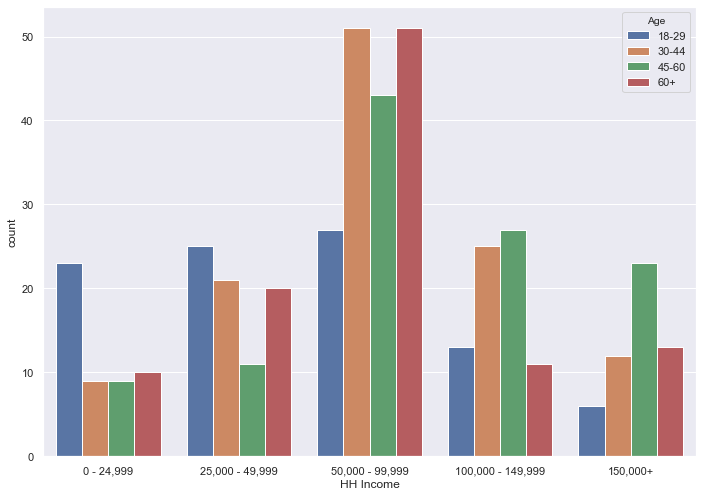

In [9]:
order=["0 - 24,999","25,000 - 49,999","50,000 - 99,999","100,000 - 149,999","150,000+"]
hue_order = ["18-29", "30-44","45-60","60+"]
sns.countplot(x="HH Income", hue="Age", order=order, hue_order=hue_order, data=data)
plt.show()

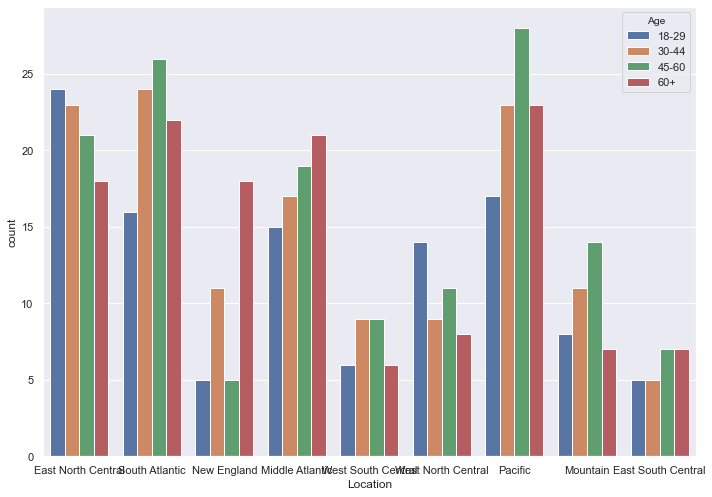

In [43]:
hue_order = ["18-29", "30-44","45-60","60+"]
sns.countplot(x="Location", hue="Age", hue_order=hue_order, data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

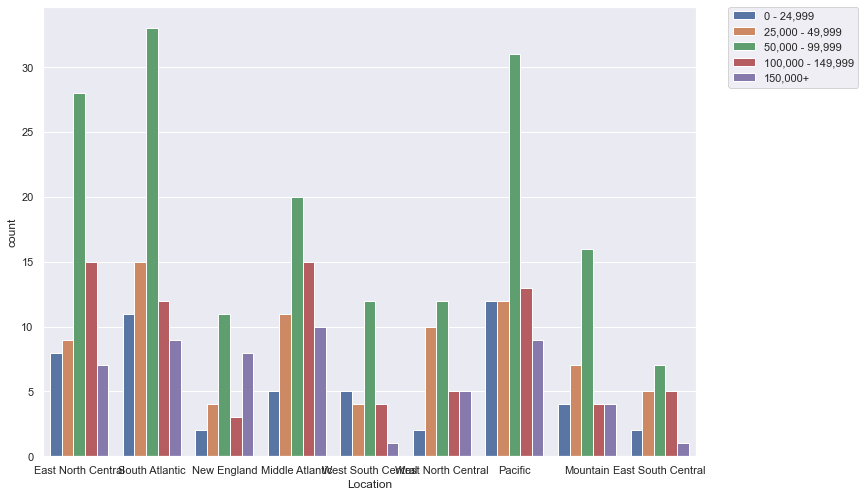

In [44]:
hue_order=["0 - 24,999","25,000 - 49,999","50,000 - 99,999","100,000 - 149,999","150,000+"]
sns.countplot(x="Location", hue="HH Income", hue_order=hue_order, data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

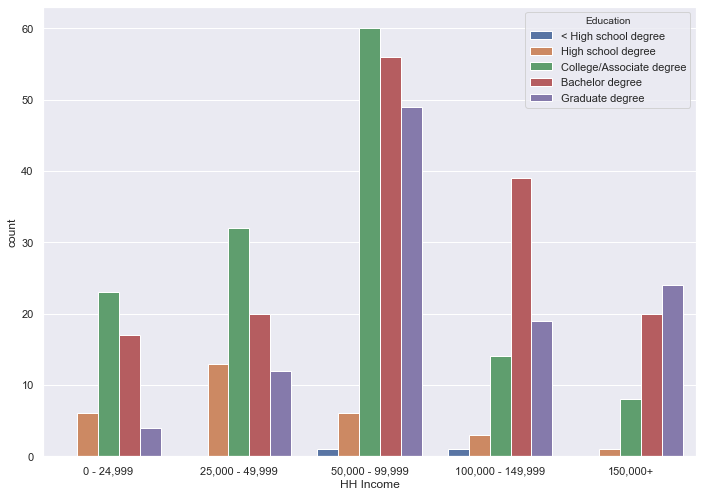

In [39]:
order=["0 - 24,999","25,000 - 49,999","50,000 - 99,999","100,000 - 149,999","150,000+"]
hue_order=['< High school degree','High school degree', 'College/Associate degree', 'Bachelor degree', 'Graduate degree']
sns.countplot(x="HH Income", hue="Education", order=order, hue_order=hue_order, data=data)
plt.show()

### Steak Survey Analysis

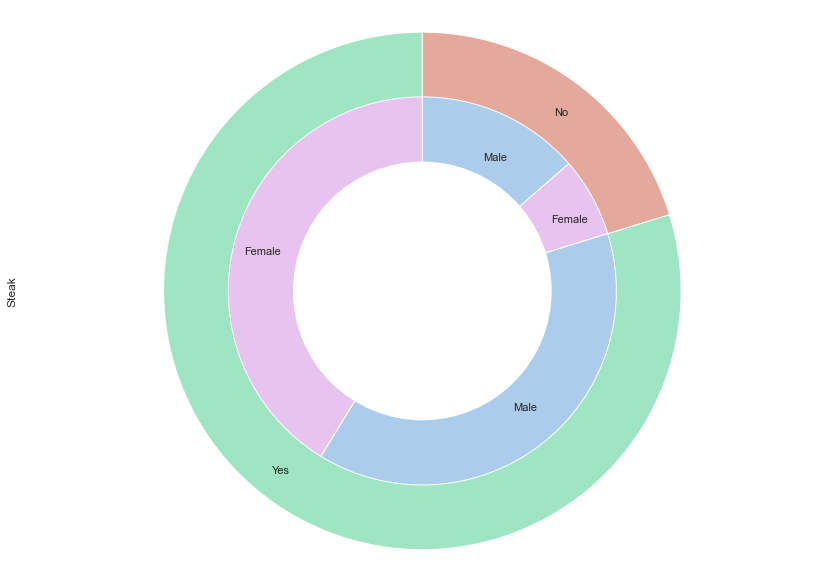

In [13]:
colors=['#9fe4c3', '#e4a99b']
colors_gender=['#acccec','#e7c3ef','#acccec','#e7c3ef']
gender_count = list(data.groupby(['Steak', 'Gender']).count()['ID'])

data['Steak'].value_counts().plot.pie(labels=['Yes','No'], radius = 0.8, pctdistance=0.83, labeldistance=0.86, startangle=90,colors=colors,frame = True)

plt.pie(gender_count, labels = ['Male','Female','Male','Female'], radius=0.6, pctdistance=0.75, labeldistance=0.76,colors=colors_gender,counterclock=False,startangle=90)
centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

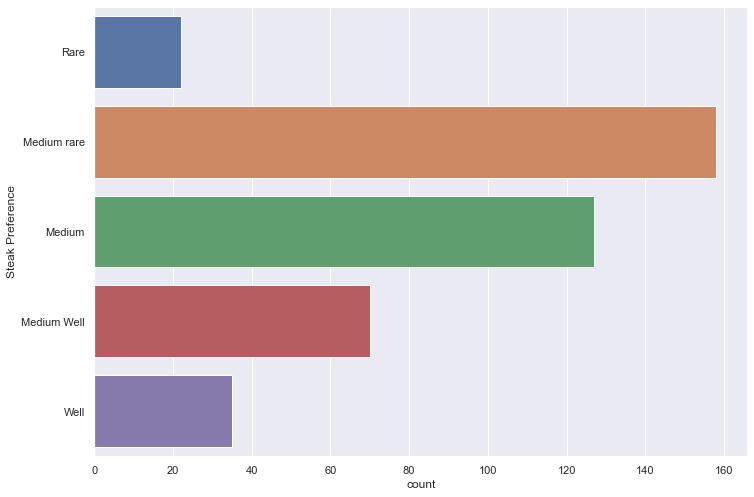

In [14]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(y="Steak Preference", order=order,data=data)
plt.show()

In [15]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ID,Lottery Survey,Smoking,Drinking,Gambling,Skydiving,Rash Driving,Cheated,Steak
ID,1.00,-0.03,-0.02,0.03,0.01,-0.01,-0.06,-0.01,0.04
Lottery Survey,-0.03,1.00,0.05,0.06,0.10,-0.03,0.01,-0.01,-0.04
Smoking,-0.02,0.05,1.00,0.10,0.20,0.01,-0.06,0.07,0.06
Drinking,0.03,0.06,0.10,1.00,0.23,-0.01,0.20,0.04,0.07
Gambling,0.01,0.10,0.20,0.23,1.00,-0.04,0.10,0.01,0.10
Skydiving,-0.01,-0.03,0.01,-0.01,-0.04,1.00,0.02,0.06,-0.02
Rash Driving,-0.06,0.01,-0.06,0.20,0.10,0.02,1.00,0.00,0.09
Cheated,-0.01,-0.01,0.07,0.04,0.01,0.06,0.00,1.00,-0.02
Steak,0.04,-0.04,0.06,0.07,0.10,-0.02,0.09,-0.02,1.00


In [16]:
pd.crosstab(data['Smoking'], data['Drinking'])

Drinking,0,1
Smoking,,
0,111,322
1,11,70


In [17]:
chi2_contingency(pd.crosstab(data['Smoking'], data['Drinking']))

(4.832190867221191,
 0.02793311296670016,
 1,
 array([[102.77431907, 330.22568093],
        [ 19.22568093,  61.77431907]]))

In [18]:
pd.crosstab(data['Gambling'], data['Drinking'])

Drinking,0,1
Gambling,,
0,89,181
1,33,211


In [19]:
chi2_contingency(pd.crosstab(data['Gambling'], data['Drinking']))

(25.6910508899206,
 4.0068079671037296e-07,
 1,
 array([[ 64.08560311, 205.91439689],
        [ 57.91439689, 186.08560311]]))

In [20]:
pd.crosstab(data['Rash Driving'], data['Drinking'])

Drinking,0,1
Rash Driving,,
0,28,31
1,94,361


In [21]:
chi2_contingency(pd.crosstab(data['Rash Driving'], data['Drinking']))

(19.266250469452746,
 1.1369847835355693e-05,
 1,
 array([[ 14.00389105,  44.99610895],
        [107.99610895, 347.00389105]]))

In [22]:
pd.crosstab(data['Lottery Survey'], data['Gambling'])

Gambling,0,1
Lottery Survey,,
0,151,111
1,119,133


In [23]:
chi2_contingency(pd.crosstab(data['Lottery Survey'], data['Gambling']))

(5.174042189751094,
 0.022926807880847406,
 1,
 array([[137.62645914, 124.37354086],
        [132.37354086, 119.62645914]]))

### Steak Preference Analysis

In [82]:
onlySteak_data = data.loc[data['Steak']==1]
onlySteak_data = onlySteak_data.drop('Steak', 1)

onlySteak_data.loc[data['Steak Preference'] == 'Rare', 'Steak Preference'] = 1
onlySteak_data.loc[data['Steak Preference'] == 'Medium rare', 'Steak Preference'] = 2
onlySteak_data.loc[data['Steak Preference'] == 'Medium', 'Steak Preference'] = 3
onlySteak_data.loc[data['Steak Preference'] == 'Medium Well', 'Steak Preference'] = 4
onlySteak_data.loc[data['Steak Preference'] == 'Well', 'Steak Preference'] = 5

onlySteak_data.loc[:, 'Steak Preference'] = onlySteak_data['Steak Preference'].astype(str).astype(int)
onlySteak_data.head()

,ID,Lottery Survey,Smoking,Drinking,Gambling,Skydiving,Rash Driving,Cheated,Steak Preference,Gender,Age,HH Income,Education,Location
2,3.234982e+09,1,0,1,0,0,0,0,2,Male,60+,"50,000 - 99,999",College/Associate degree,East North Central
3,3.234973e+09,1,0,1,1,0,1,1,1,Male,60+,"150,000+",Graduate degree,South Atlantic
4,3.234972e+09,0,1,1,1,0,1,1,3,Male,60+,"50,000 - 99,999",Bachelor degree,New England
5,3.234959e+09,0,0,1,0,0,1,1,3,Male,60+,"50,000 - 99,999",Graduate degree,Middle Atlantic
6,3.234955e+09,1,0,0,0,0,1,0,2,Male,18-29,"0 - 24,999",College/Associate degree,West South Central


In [81]:
corr1 = onlySteak_data.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,ID,Lottery Survey,Smoking,Drinking,Gambling,Skydiving,Rash Driving,Cheated,Steak Preference
ID,1.00,-0.01,-0.02,0.01,0.03,0.03,-0.08,0.01,-0.04
Lottery Survey,-0.01,1.00,0.06,0.07,0.10,0.00,0.08,0.01,0.02
Smoking,-0.02,0.06,1.00,0.11,0.16,0.01,-0.09,0.08,-0.05
Drinking,0.01,0.07,0.11,1.00,0.25,-0.02,0.17,0.04,-0.06
Gambling,0.03,0.10,0.16,0.25,1.00,-0.01,0.09,-0.02,-0.01
Skydiving,0.03,0.00,0.01,-0.02,-0.01,1.00,-0.01,0.06,0.02
Rash Driving,-0.08,0.08,-0.09,0.17,0.09,-0.01,1.00,-0.00,-0.05
Cheated,0.01,0.01,0.08,0.04,-0.02,0.06,-0.00,1.00,0.04
Steak Preference,-0.04,0.02,-0.05,-0.06,-0.01,0.02,-0.05,0.04,1.00


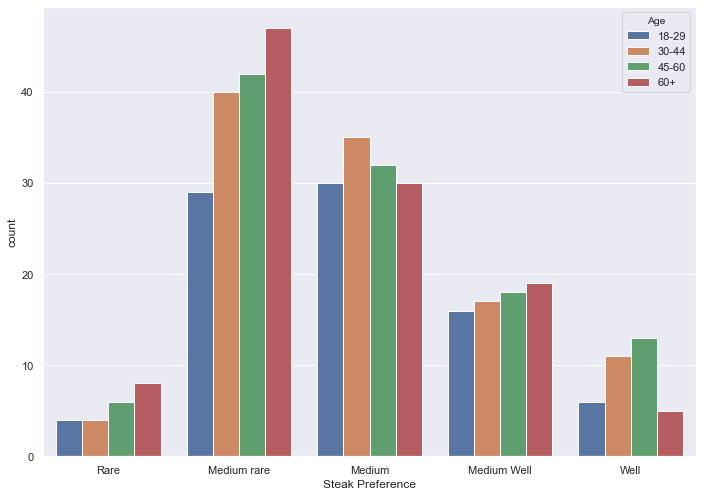

In [24]:
hue_order = ["18-29", "30-44","45-60","60+"]
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue="Age", hue_order=hue_order, order=order, data=data)
plt.show()

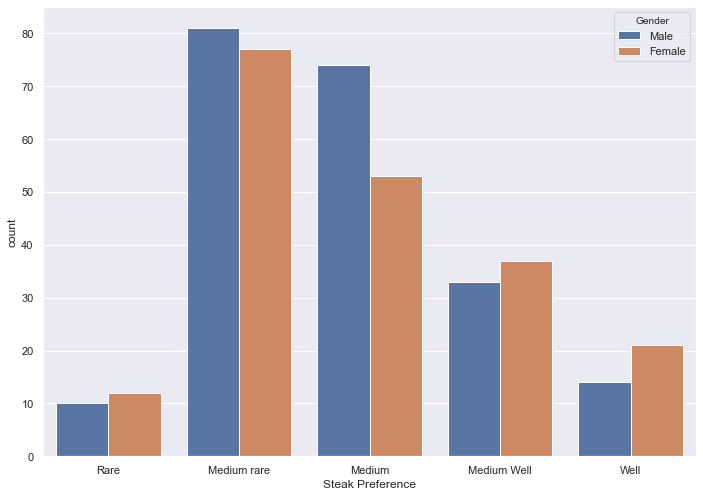

In [25]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue="Gender", order=order, data=data)
plt.show()

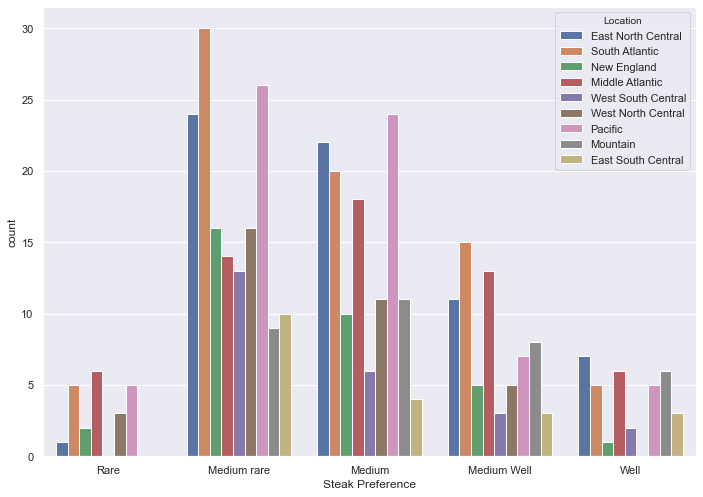

In [41]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue="Location", order=order, data=data)
plt.show()

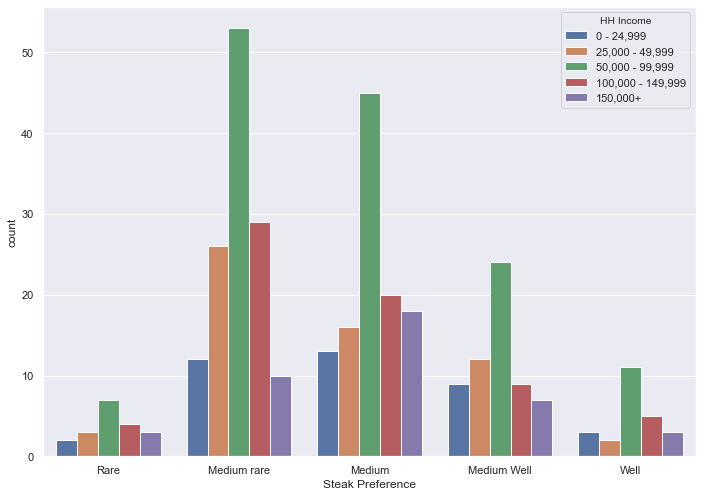

In [27]:
hue_order = ["0 - 24,999","25,000 - 49,999","50,000 - 99,999","100,000 - 149,999","150,000+"]
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue="HH Income", hue_order=hue_order, order=order, data=data)
plt.show()

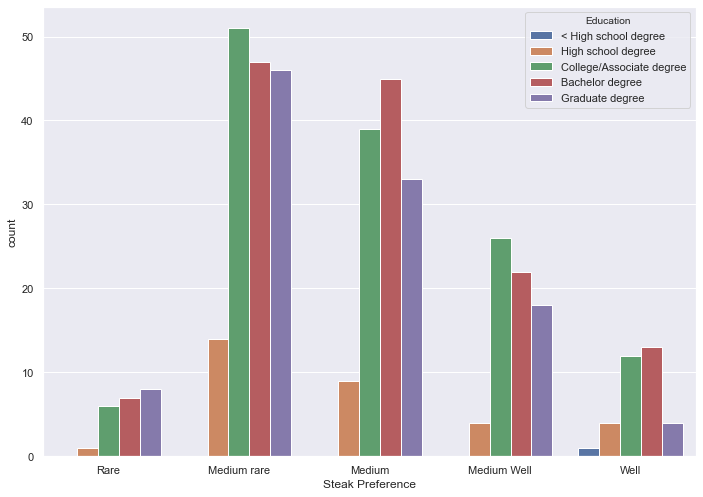

In [28]:
hue_order=['< High school degree','High school degree', 'College/Associate degree', 'Bachelor degree', 'Graduate degree']
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue="Education", hue_order=hue_order, order=order, data=data)
plt.show()

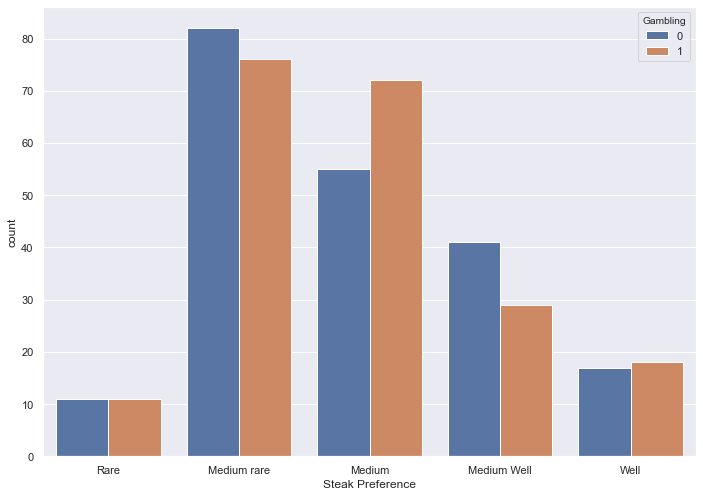

In [29]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue="Gambling", order=order, data=data)
plt.show()

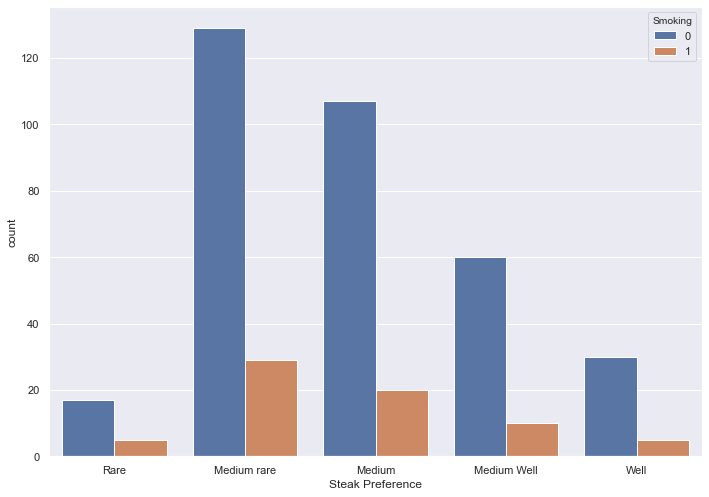

In [30]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue = 'Smoking', order=order, data=data)
plt.show()

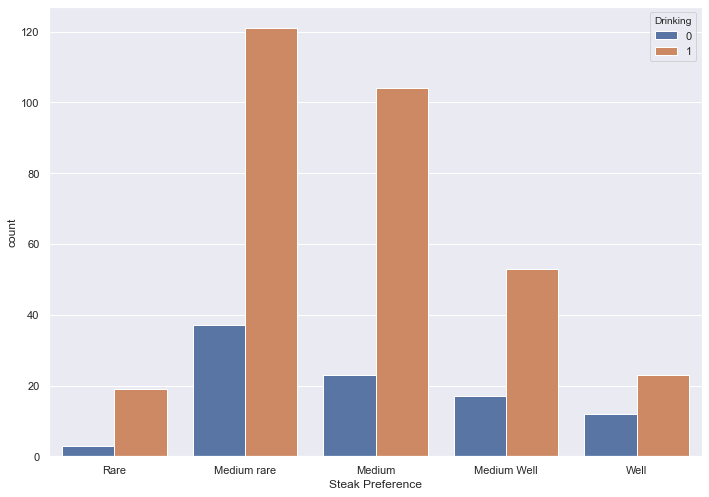

In [31]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue = 'Drinking', order=order, data=data)
plt.show()

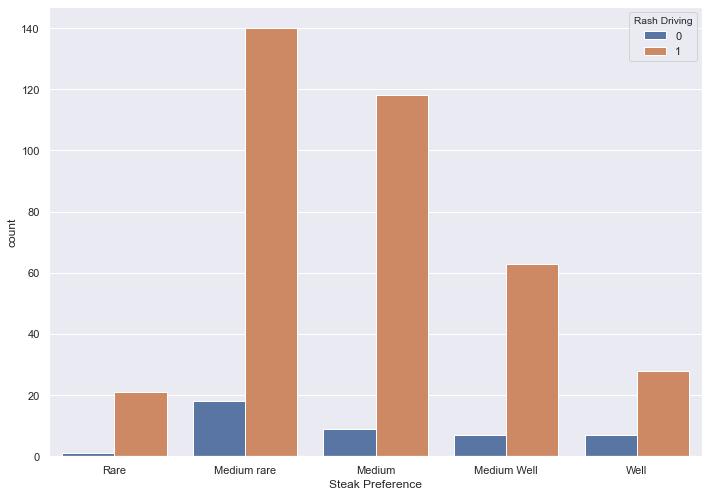

In [32]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue = 'Rash Driving', order=order, data=data)
plt.show()

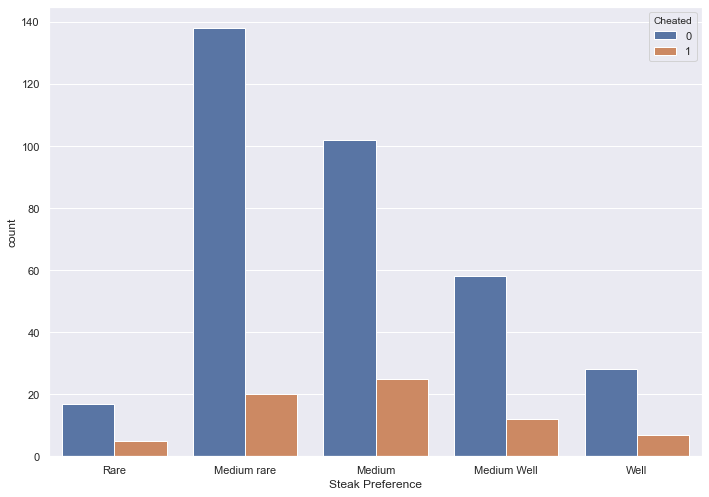

In [33]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue = 'Cheated', order=order, data=data)
plt.show()

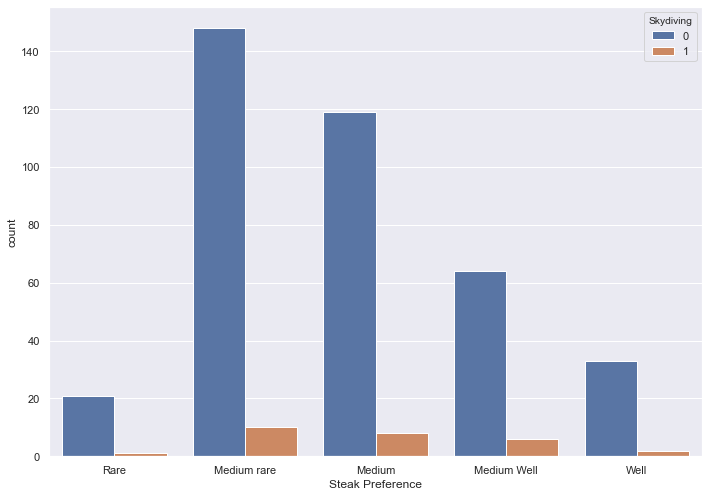

In [34]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue = 'Skydiving', order=order, data=data)
plt.show()

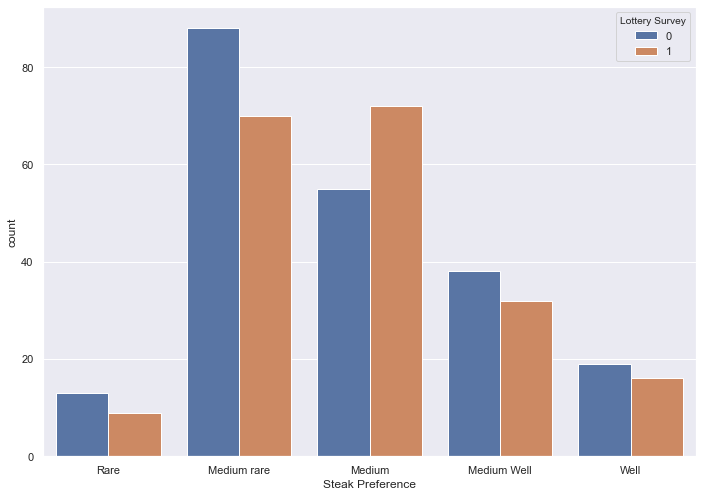

In [35]:
order = ['Rare','Medium rare','Medium','Medium Well','Well']
sns.countplot(x="Steak Preference", hue = 'Lottery Survey', order=order, data=data)
plt.show()

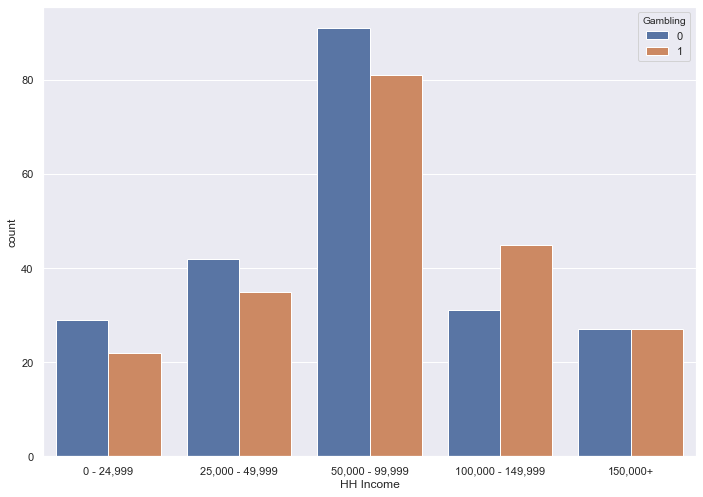

In [84]:
order = ["0 - 24,999","25,000 - 49,999","50,000 - 99,999","100,000 - 149,999","150,000+"]
sns.countplot(x="HH Income", hue = 'Gambling', order=order, data=data)
plt.show()

In [86]:
data.groupby(['Steak', 'Gender']).count()['ID']

Steak  Gender
0      Female     70
       Male       34
1      Female    198
       Male      212
Name: ID, dtype: int64